<a href="https://colab.research.google.com/github/NimsW20/EN3160-Assignments/blob/main/Vision_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Implement the intensity transformation

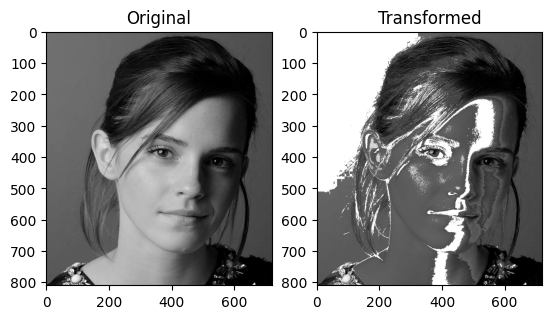

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (Grayscale)
img = cv2.imread('emma.jpg', 0)  # 0 to load in grayscale

# Create an empty array for the transformed image
transformed_img = np.zeros_like(img)

# Apply the transformation
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel = img[i, j]
        if pixel <= 50:
            transformed_img[i, j] = pixel * 2
        elif 50 < pixel <= 100:
            transformed_img[i, j] = pixel
        elif 100 < pixel <= 150:
            transformed_img[i, j] = 255
        elif 150 < pixel <= 200:
            transformed_img[i, j] = pixel // 2
        else:
            transformed_img[i, j] = pixel

# Display original and transformed images
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(transformed_img, cmap='gray'), plt.title('Transformed')
plt.show()


### 2. Apply a similar operation to accentuate white matter and gray matter in the brain proton density image

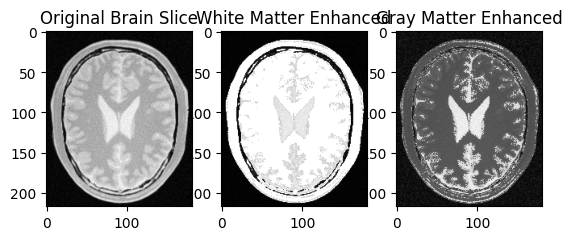

In [2]:
img = cv2.imread('brain_proton_density_slice.png', 0)

# Adjust the intensity ranges for white matter and gray matter
def transform_for_white_matter(pixel):
    if pixel < 100:  # Gray matter
        return pixel // 2  # Reduce gray matter intensity
    elif 100 <= pixel <= 200:  # White matter
        return min(255, pixel * 2)  # Boost white matter
    else:
        return pixel

def transform_for_gray_matter(pixel):
    if pixel < 100:  # Gray matter
        return min(255, pixel * 2)  # Boost gray matter
    elif 100 <= pixel <= 200:  # White matter
        return pixel // 2  # Reduce white matter intensity
    else:
        return pixel

# Apply transformation
white_matter_img = np.array([[transform_for_white_matter(px) for px in row] for row in img])
gray_matter_img = np.array([[transform_for_gray_matter(px) for px in row] for row in img])

# Display images
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Brain Slice')
plt.subplot(132), plt.imshow(white_matter_img, cmap='gray'), plt.title('White Matter Enhanced')
plt.subplot(133), plt.imshow(gray_matter_img, cmap='gray'), plt.title('Gray Matter Enhanced')
plt.show()


### 3. Gamma Correction in Lab Color Space

 (a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value

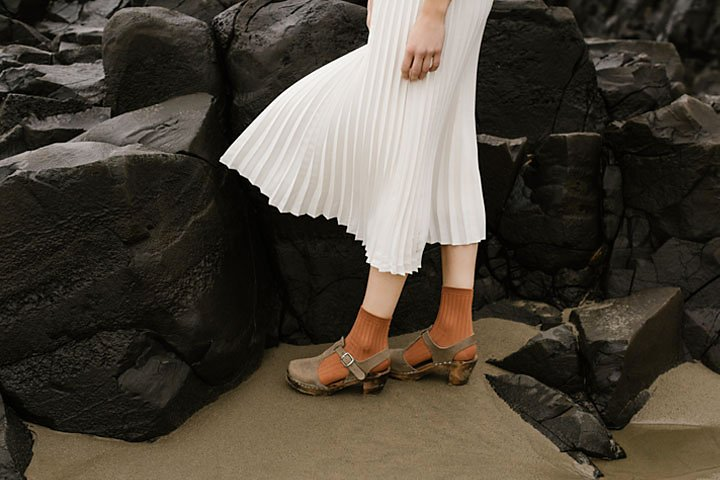

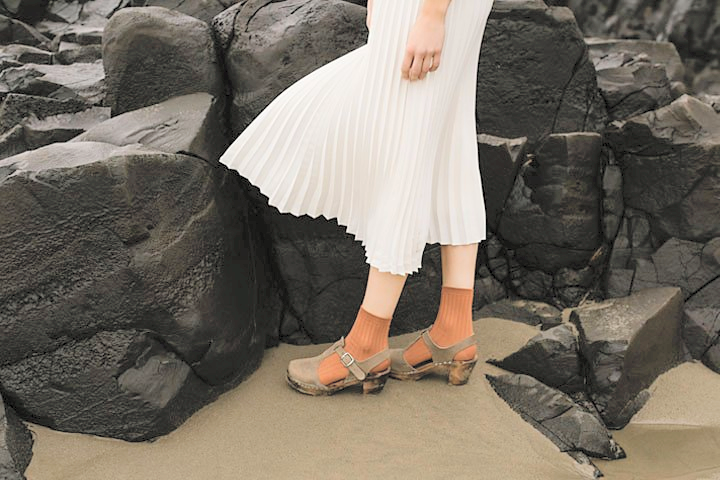

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the image
img = cv2.imread('highlights_and_shadows.jpg')

# Convert to L*a*b* color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(lab)

# Apply gamma correction to the L plane
gamma = 0.5  # Example gamma value, adjust as needed
L_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L plane with the original a and b planes
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert back to RGB color space
img_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Display the original and gamma-corrected images
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(img_corrected)
cv2.waitKey(0)
cv2.destroyAllWindows()

 (b) Show the histograms of the original and corrected images.

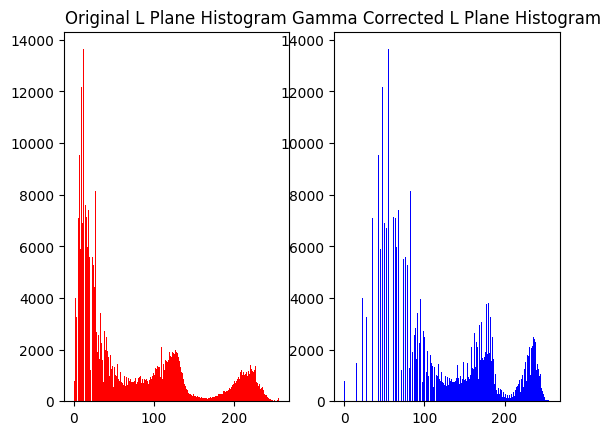

In [5]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(L.flatten(), bins=256, range=[0, 256], color='r')
plt.title('Original L Plane Histogram')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Gamma Corrected L Plane Histogram')

plt.show()


### 4. Increasing Vibrance of a Photograph Using Intensity Transformation

 (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

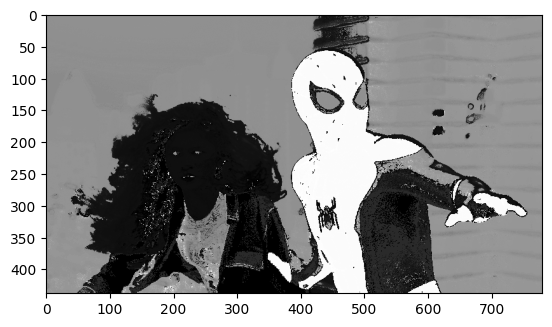

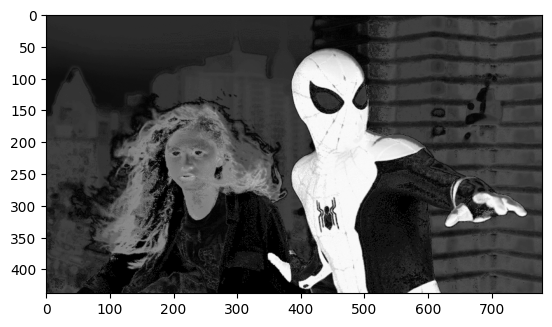

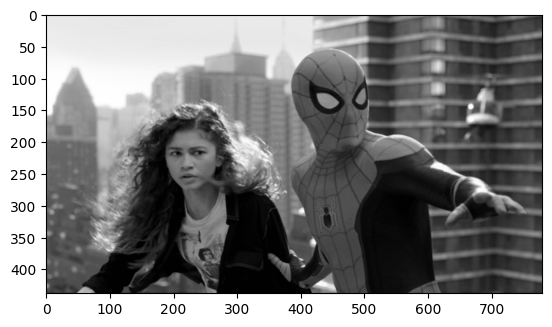

In [9]:
img = cv2.imread('spider.png')

# Convert image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value channels
H, S, V = cv2.split(hsv)

#plot the splited image
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(S, cmap='gray')
plt.show()
plt.imshow(V, cmap='gray')
plt.show()


(b) Apply the aforementioned intensity transformation to the saturation plane.

In [10]:
sigma = 70
a = 0.5  # Adjust this value for a pleasing output

def vibrance_enhance(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Apply the function to each pixel in the Saturation plane
S_enhanced = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')
